# Anomaly Detection Feature Study
## 0. Prerequisites
### Data
High-level features from DelphesHerwig (background) and DelphesPythia (background, W' signal)

In [1]:
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading Data

In [2]:
herwig = "GAN\data\events_anomalydetection_DelphesHerwig_qcd_features.h5"
pythiabg = "GAN\data\events_anomalydetection_DelphesPythia8_v2_qcd_features.h5"
pythiasig = "GAN\data\events_anomalydetection_DelphesPythia8_v2_Wprime_features.h5"

datatypes = ["herwig", "pythiabg", "pythiasig"]
df = {}

df["herwig"] = pd.read_hdf(herwig)
print("Herwig shape: " + str(df["herwig"].shape))
print("Memory usage in GB:", round(sum(df["herwig"].memory_usage(deep=True)) / (1024**3), 3))

df["pythiabg"] = pd.read_hdf(pythiabg)
print("Pythia background shape: " + str(df["pythiabg"].shape))
print("Memory usage in GB:", round(sum(df["pythiabg"].memory_usage(deep=True)) / (1024**3), 3))

df["pythiasig"] = pd.read_hdf(pythiasig)
print("Pythia signal shape: " + str(df["pythiasig"].shape))
print("Memory usage in GB:", round(sum(df["pythiasig"].memory_usage(deep=True)) / (1024**3), 3))

Herwig shape: (999999, 14)
Memory usage in GB: 0.112
Pythia background shape: (999999, 14)
Memory usage in GB: 0.112
Pythia signal shape: (99999, 14)
Memory usage in GB: 0.011


In [3]:
df["herwig"]

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2
0,-1062.890015,-628.263000,1.169330,223.070007,186.315994,108.044998,68.937798,785.325012,370.963013,-111.802002,67.170799,50.092701,28.765200,15.288100
1,-561.768005,-1116.109985,-865.270020,242.136002,88.407402,20.304501,12.437700,508.622009,966.379028,-325.015015,77.530197,36.413601,31.230499,24.091101
2,-1737.829956,-749.458008,-321.303009,95.748199,30.898800,22.592400,16.777599,929.109009,955.013977,1421.810059,583.320984,342.750000,61.851898,36.460602
3,-798.586975,918.947998,2056.659912,440.657013,238.959000,144.123993,71.498199,537.398987,-838.393005,-1693.349976,144.897003,36.847801,28.074800,14.404400
4,647.491028,-1165.069946,-59.776699,51.966702,24.274799,4.958610,2.036370,-794.692993,1014.479980,-1927.390015,116.587997,41.674801,18.256599,12.612700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-710.262024,-1026.920044,-1307.729980,796.106995,744.283020,368.661987,210.828003,692.814026,976.697998,-41.325802,32.149200,10.357700,7.979660,4.746760
999995,-268.907990,1307.540039,1420.180054,333.614014,240.792007,171.697006,130.660995,155.938995,-1274.060059,-1473.140015,124.994003,86.582901,25.811399,18.830799
999996,65.702904,-1444.400024,-1056.260010,77.524902,39.939301,23.995701,13.755400,314.462006,1388.619995,-158.914001,420.259003,295.635986,57.412300,44.277100
999997,-133.639999,1522.699951,-229.511993,632.781006,504.207001,105.698997,48.149700,29.203501,-1470.739990,-839.638977,189.417999,60.181000,42.477699,32.273899


In [4]:
df["pythiabg"]

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2
0,-1467.239990,611.502014,511.101990,38.896000,8.290650,4.836080,4.260190,1403.579956,-674.551025,-451.670990,237.893997,79.815102,21.010300,16.757601
1,-1211.239990,347.315002,547.963013,389.532013,191.804001,99.562798,70.872200,619.341003,-62.177299,-1944.040039,22.999201,8.042180,6.335090,5.525370
2,-1229.619995,649.857971,8.089170,72.155502,47.168098,37.243198,33.658199,1196.250000,-647.896973,-1283.109985,78.230698,15.292900,13.944200,10.013500
3,-693.304016,-1046.729980,1716.910034,55.797798,24.788500,6.890140,5.813400,747.961975,994.250000,-412.966003,359.113007,175.209000,103.500999,84.447098
4,-1488.199951,-25.370100,-30.989700,84.891502,26.878799,15.517200,13.260400,1415.640015,20.905100,223.630997,77.506500,57.986000,34.147400,26.660601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,-646.442017,-1295.150024,1331.800049,37.011299,21.006800,12.873700,8.898860,274.566986,1019.390015,-504.290985,90.375000,61.218800,20.514500,15.854600
999995,-286.550995,-1310.829956,-1510.910034,147.516998,60.997799,41.356201,28.225700,252.884995,1085.420044,759.314026,58.769901,42.276402,8.637120,7.852020
999996,918.562988,951.195984,-1622.569946,32.242199,5.894110,5.004100,3.992740,-266.285004,-1284.189941,185.007996,136.389008,70.623901,49.508499,40.708599
999997,1447.219971,-547.710999,827.945007,396.112000,181.406998,152.207993,86.676804,-932.369995,165.005005,-2806.959961,56.471600,14.446400,10.258900,8.874700


In [5]:
df["pythiasig"]

,pxj1,pyj1,pzj1,mj1,tau1j1,tau2j1,tau3j1,pxj2,pyj2,pzj2,mj2,tau1j2,tau2j2,tau3j2
0,-1698.670044,-884.039978,723.843018,105.035004,83.721703,46.282101,13.635700,1539.439941,372.238007,-295.865997,461.574005,431.343994,52.344799,37.284901
1,1246.660034,-1133.010010,-921.987000,159.865997,133.781998,58.968601,30.377399,-1218.489990,1108.380005,182.147003,514.883972,462.654999,138.789001,67.805801
2,420.975006,-1739.790039,281.553986,93.665901,77.925797,10.605900,6.916520,-510.779999,1484.069946,227.175995,475.316986,217.113998,29.424000,21.020300
3,161.048996,-1664.859985,-2005.099976,116.327003,61.819698,38.143600,18.414400,-188.942993,1556.900024,-561.664001,561.236023,348.181000,102.625000,53.422699
4,-564.754028,-1315.599976,-1087.410034,513.015991,276.446991,50.629799,35.460999,326.164001,1050.239990,1201.000000,108.752998,89.666603,40.928699,17.055799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,-206.662003,-1729.280029,357.635010,96.165001,58.014500,11.731300,6.174070,218.800003,1714.890015,-210.578995,472.475006,259.884003,40.806999,31.226000
99995,1069.660034,659.874023,218.751007,126.183998,122.486000,27.608700,17.924801,-956.169006,-297.311005,-2204.350098,108.890999,21.177200,10.582400,9.138590
99996,-1286.619995,-86.162598,-1366.270020,115.719002,109.853996,29.830200,22.489201,1145.729980,136.792007,1216.780029,489.053009,416.747009,84.599998,66.767502
99997,-149.330002,1781.459961,-58.690899,508.045013,495.290985,82.283600,43.567902,84.726601,-1378.569946,-1485.469971,91.104897,79.120102,46.537300,23.227301


## 2. Plot Features
### Jet Masses

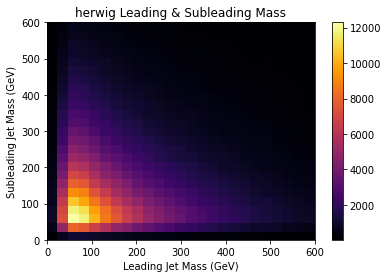

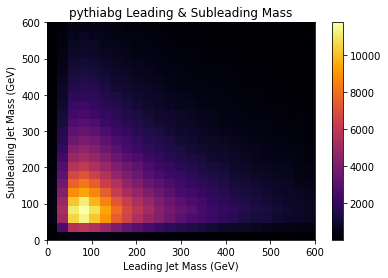

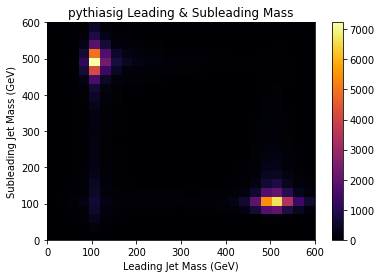

In [6]:
for datatype in datatypes:
    plt.title(datatype + " Leading & Subleading Mass")
    plt.ylabel("Subleading Jet Mass (GeV)")
    plt.xlabel("Leading Jet Mass (GeV)")
    plt.hist2d(df[datatype]["mj1"], df[datatype]["mj2"], bins = 25, range = [[0,600],[0,600]], cmap = 'inferno')
    plt.colorbar()
    plt.show()

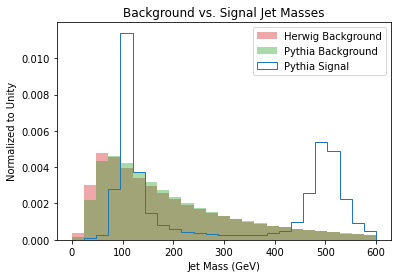

In [7]:
plt.title("Background vs. Signal Jet Masses")
plt.ylabel("Normalized to Unity")
plt.xlabel("Jet Mass (GeV)")
plt.hist(np.concatenate((df["herwig"]["mj1"], df["herwig"]["mj2"])), bins = 25, range = (0, 600), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(np.concatenate((df["pythiabg"]["mj1"], df["pythiabg"]["mj2"])), bins = 25, range = (0, 600), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(np.concatenate((df["pythiasig"]["mj1"], df["pythiasig"]["mj2"])), bins = 25, range = (0, 600), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

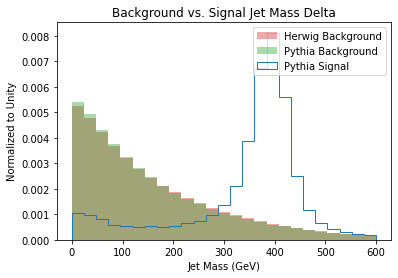

In [8]:
plt.title("Background vs. Signal Jet Mass Delta")
plt.ylabel("Normalized to Unity")
plt.xlabel("Jet Mass (GeV)")
plt.hist(np.abs(df["herwig"]["mj1"] - df["herwig"]["mj2"]), bins = 25, range = (0, 600), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(np.abs(df["pythiabg"]["mj1"] - df["pythiabg"]["mj2"]), bins = 25, range = (0, 600), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(np.abs(df["pythiasig"]["mj1"] - df["pythiasig"]["mj2"]), bins = 25, range = (0, 600), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

### Jet Energies

In [9]:
for datatype in datatypes:
    df[datatype]["ej1"] = np.sqrt(df[datatype]["mj1"]**2 + df[datatype]["pxj1"]**2 + df[datatype]["pyj1"]**2 + df[datatype]["pzj1"]**2)
    df[datatype]["ej2"] = np.sqrt(df[datatype]["mj2"]**2 + df[datatype]["pxj2"]**2 + df[datatype]["pyj2"]**2 + df[datatype]["pzj2"]**2)

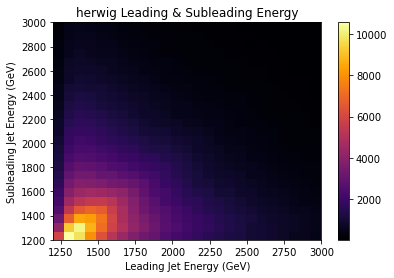

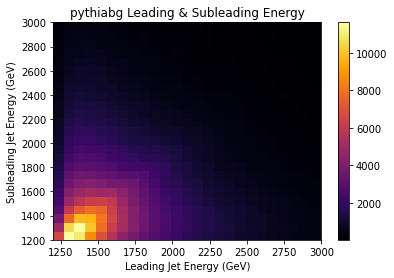

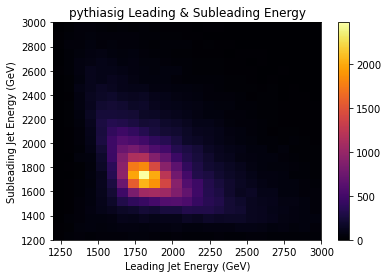

In [10]:
for datatype in datatypes:
    plt.title(datatype + " Leading & Subleading Energy")
    plt.ylabel("Subleading Jet Energy (GeV)")
    plt.xlabel("Leading Jet Energy (GeV)")
    plt.hist2d(df[datatype]["ej1"], df[datatype]["ej2"], bins = 25, range = [[1200,3000],[1200,3000]], cmap = 'inferno')
    plt.colorbar()
    plt.show()

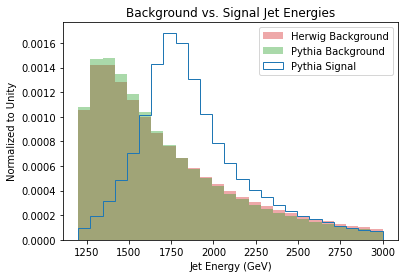

In [11]:
plt.title("Background vs. Signal Jet Energies")
plt.ylabel("Normalized to Unity")
plt.xlabel("Jet Energy (GeV)")
plt.hist(np.concatenate((df["herwig"]["ej1"], df["herwig"]["ej2"])), bins = 25, range = (1200, 3000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(np.concatenate((df["pythiabg"]["ej1"], df["pythiabg"]["ej2"])), bins = 25, range = (1200, 3000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(np.concatenate((df["pythiasig"]["ej1"], df["pythiasig"]["ej2"])), bins = 25, range = (1200, 3000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

### Event Mass & Energy

In [12]:
for datatype in datatypes:
    df[datatype]["ejj"] = df[datatype]["ej1"] + df[datatype]["ej2"]
    df[datatype]["pjj"] = np.sqrt((df[datatype]["pxj1"] + df[datatype]["pxj2"])**2 + (df[datatype]["pyj1"] + df[datatype]["pyj2"])**2 + (df[datatype]["pyj1"] + df[datatype]["pyj2"])**2)
    df[datatype]["mjj"] = np.sqrt(df[datatype]["ejj"]**2 - df[datatype]["pjj"]**2)

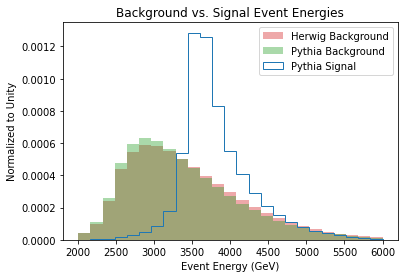

In [13]:
plt.title("Background vs. Signal Event Energies")
plt.ylabel("Normalized to Unity")
plt.xlabel("Event Energy (GeV)")
plt.hist(df["herwig"]["ejj"], bins = 25, range = (2000, 6000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["ejj"], bins = 25, range = (2000, 6000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["ejj"], bins = 25, range = (2000, 6000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

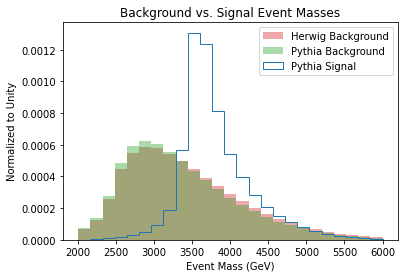

In [14]:
plt.title("Background vs. Signal Event Masses")
plt.ylabel("Normalized to Unity")
plt.xlabel("Event Mass (GeV)")
plt.hist(df["herwig"]["mjj"], bins = 25, range = (2000, 6000), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(df["pythiabg"]["mjj"], bins = 25, range = (2000, 6000), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(df["pythiasig"]["mjj"], bins = 25, range = (2000, 6000), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

### N-Subjettiness Ratio

In [15]:
for datatype in datatypes:
    df[datatype]["tau21j1"] = df[datatype]["tau2j1"] / df[datatype]["tau1j1"]
    df[datatype]["tau32j1"] = df[datatype]["tau3j1"] / df[datatype]["tau2j1"]
    df[datatype]["tau21j2"] = df[datatype]["tau2j2"] / df[datatype]["tau1j2"]
    df[datatype]["tau32j2"] = df[datatype]["tau3j2"] / df[datatype]["tau2j2"]

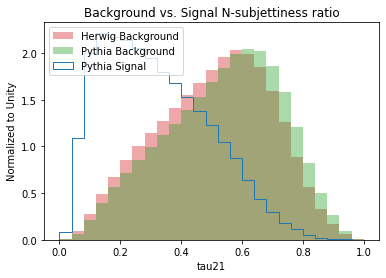

In [16]:
plt.title("Background vs. Signal N-subjettiness ratio")
plt.ylabel("Normalized to Unity")
plt.xlabel("tau21")
plt.hist(np.concatenate((df["herwig"]["tau21j1"], df["herwig"]["tau21j2"])), bins = 25, range = (0, 1), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(np.concatenate((df["pythiabg"]["tau21j1"], df["pythiabg"]["tau21j2"])), bins = 25, range = (0, 1), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(np.concatenate((df["pythiasig"]["tau21j1"], df["pythiasig"]["tau21j2"])), bins = 25, range = (0, 1), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()

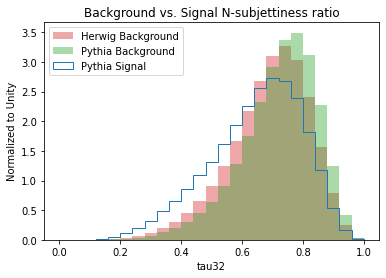

In [17]:
plt.title("Background vs. Signal N-subjettiness ratio")
plt.ylabel("Normalized to Unity")
plt.xlabel("tau32")
plt.hist(np.concatenate((df["herwig"]["tau32j1"], df["herwig"]["tau32j2"])), bins = 25, range = (0, 1), color = "tab:red", alpha = 0.4, label = "Herwig Background", density = True)
plt.hist(np.concatenate((df["pythiabg"]["tau32j1"], df["pythiabg"]["tau32j2"])), bins = 25, range = (0, 1), color = "tab:green", alpha = 0.4, label = "Pythia Background", density = True)
plt.hist(np.concatenate((df["pythiasig"]["tau32j1"], df["pythiasig"]["tau32j2"])), bins = 25, range = (0, 1), color = "tab:blue", histtype = "step", label = "Pythia Signal", density = True)
plt.legend()
plt.show()